## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [12]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [13]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [14]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [15]:
    """Code Here
    建立你的神經網路
    """
    
def build_mlp():
        input_layer = keras.layers.Input([x_train.shape[-1]])
        x = keras.layers.Dense(units=512, activation="relu")(input_layer)
        x = keras.layers.Dense(units=256, activation="relu")(x)
        x = keras.layers.Dense(units=128, activation="relu")(x)
        out = keras.layers.Dense(units=10, activation="softmax")(x)
        model = keras.models.Model(inputs=[input_layer], outputs=[out])
        return model

model = build_mlp()

In [18]:
"""
Compile 模型
"""
model.summary()

optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_7 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_8 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [19]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs= 500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 6s 125us/step - loss: 1.3120 - acc: 0.5412 - val_loss: 1.3941 - val_acc: 0.5054
Epoch 2/500
50000/50000 [==============================] - 6s 113us/step - loss: 1.3072 - acc: 0.5425 - val_loss: 1.3925 - val_acc: 0.5085
Epoch 3/500
50000/50000 [==============================] - 6s 113us/step - loss: 1.3054 - acc: 0.5431 - val_loss: 1.3900 - val_acc: 0.5086
Epoch 4/500
50000/50000 [==============================] - 6s 125us/step - loss: 1.3036 - acc: 0.5435 - val_loss: 1.3908 - val_acc: 0.5064
Epoch 5/500
50000/50000 [==============================] - 6s 114us/step - loss: 1.3023 - acc: 0.5428 - val_loss: 1.3905 - val_acc: 0.5054
Epoch 6/500
50000/50000 [==============================] - 6s 111us/step - loss: 1.3012 - acc: 0.5440 - val_loss: 1.3885 - val_acc: 0.5061
Epoch 7/500
50000/50000 [==============================] - 6s 116us/step - loss: 1.2999 - acc: 0.5437 - val_loss: 1.

50000/50000 [==============================] - 6s 111us/step - loss: 1.2418 - acc: 0.5666 - val_loss: 1.3640 - val_acc: 0.5195
Epoch 60/500
50000/50000 [==============================] - 6s 119us/step - loss: 1.2407 - acc: 0.5675 - val_loss: 1.3646 - val_acc: 0.5185
Epoch 61/500
50000/50000 [==============================] - 5s 109us/step - loss: 1.2399 - acc: 0.5665 - val_loss: 1.3596 - val_acc: 0.5172
Epoch 62/500
50000/50000 [==============================] - 6s 110us/step - loss: 1.2386 - acc: 0.5666 - val_loss: 1.3603 - val_acc: 0.5165
Epoch 63/500
50000/50000 [==============================] - 5s 109us/step - loss: 1.2377 - acc: 0.5677 - val_loss: 1.3645 - val_acc: 0.5126
Epoch 64/500
50000/50000 [==============================] - 5s 108us/step - loss: 1.2365 - acc: 0.5685 - val_loss: 1.3615 - val_acc: 0.5183
Epoch 65/500
50000/50000 [==============================] - 6s 113us/step - loss: 1.2354 - acc: 0.5682 - val_loss: 1.3583 - val_acc: 0.5189
Epoch 66/500
50000/50000 [=======

50000/50000 [==============================] - 5s 107us/step - loss: 1.1812 - acc: 0.5884 - val_loss: 1.3407 - val_acc: 0.5269
Epoch 118/500
50000/50000 [==============================] - 6s 112us/step - loss: 1.1801 - acc: 0.5884 - val_loss: 1.3425 - val_acc: 0.5261
Epoch 119/500
50000/50000 [==============================] - 6s 124us/step - loss: 1.1791 - acc: 0.5888 - val_loss: 1.3387 - val_acc: 0.5242
Epoch 120/500
50000/50000 [==============================] - 6s 118us/step - loss: 1.1780 - acc: 0.5884 - val_loss: 1.3373 - val_acc: 0.5294
Epoch 121/500
50000/50000 [==============================] - 6s 113us/step - loss: 1.1768 - acc: 0.5899 - val_loss: 1.3357 - val_acc: 0.5292
Epoch 122/500
50000/50000 [==============================] - 6s 112us/step - loss: 1.1760 - acc: 0.5894 - val_loss: 1.3356 - val_acc: 0.5274
Epoch 123/500
50000/50000 [==============================] - 6s 112us/step - loss: 1.1748 - acc: 0.5903 - val_loss: 1.3357 - val_acc: 0.5263
Epoch 124/500
50000/50000 [

50000/50000 [==============================] - 5s 105us/step - loss: 1.1216 - acc: 0.6110 - val_loss: 1.3266 - val_acc: 0.5297
Epoch 176/500
50000/50000 [==============================] - 5s 105us/step - loss: 1.1206 - acc: 0.6112 - val_loss: 1.3321 - val_acc: 0.5286
Epoch 177/500
50000/50000 [==============================] - 5s 105us/step - loss: 1.1194 - acc: 0.6106 - val_loss: 1.3206 - val_acc: 0.5334
Epoch 178/500
50000/50000 [==============================] - 5s 105us/step - loss: 1.1182 - acc: 0.6111 - val_loss: 1.3183 - val_acc: 0.5338
Epoch 179/500
50000/50000 [==============================] - 5s 104us/step - loss: 1.1174 - acc: 0.6116 - val_loss: 1.3244 - val_acc: 0.5325
Epoch 180/500
50000/50000 [==============================] - 5s 104us/step - loss: 1.1168 - acc: 0.6118 - val_loss: 1.3218 - val_acc: 0.5332
Epoch 181/500
50000/50000 [==============================] - 5s 105us/step - loss: 1.1157 - acc: 0.6136 - val_loss: 1.3338 - val_acc: 0.5305
Epoch 182/500
50000/50000 [

50000/50000 [==============================] - 5s 105us/step - loss: 1.0621 - acc: 0.6316 - val_loss: 1.3220 - val_acc: 0.5353
Epoch 234/500
50000/50000 [==============================] - 5s 105us/step - loss: 1.0609 - acc: 0.6338 - val_loss: 1.3265 - val_acc: 0.5302
Epoch 235/500
50000/50000 [==============================] - 5s 105us/step - loss: 1.0605 - acc: 0.6331 - val_loss: 1.3132 - val_acc: 0.5409
Epoch 236/500
50000/50000 [==============================] - 5s 104us/step - loss: 1.0591 - acc: 0.6345 - val_loss: 1.3274 - val_acc: 0.5324
Epoch 237/500
50000/50000 [==============================] - 5s 105us/step - loss: 1.0587 - acc: 0.6322 - val_loss: 1.3142 - val_acc: 0.5361
Epoch 238/500
50000/50000 [==============================] - 5s 105us/step - loss: 1.0574 - acc: 0.6328 - val_loss: 1.3264 - val_acc: 0.5341
Epoch 239/500
50000/50000 [==============================] - 5s 104us/step - loss: 1.0564 - acc: 0.6351 - val_loss: 1.3123 - val_acc: 0.5382
Epoch 240/500
50000/50000 [

50000/50000 [==============================] - 6s 113us/step - loss: 1.0033 - acc: 0.6548 - val_loss: 1.3237 - val_acc: 0.5390
Epoch 292/500
50000/50000 [==============================] - 6s 121us/step - loss: 1.0022 - acc: 0.6540 - val_loss: 1.3187 - val_acc: 0.5371
Epoch 293/500
50000/50000 [==============================] - 5s 108us/step - loss: 1.0013 - acc: 0.6539 - val_loss: 1.3186 - val_acc: 0.5379
Epoch 294/500
50000/50000 [==============================] - 5s 107us/step - loss: 1.0004 - acc: 0.6557 - val_loss: 1.3243 - val_acc: 0.5352
Epoch 295/500
50000/50000 [==============================] - 5s 110us/step - loss: 0.9986 - acc: 0.6558 - val_loss: 1.3134 - val_acc: 0.5410
Epoch 296/500
50000/50000 [==============================] - 5s 109us/step - loss: 0.9974 - acc: 0.6557 - val_loss: 1.3217 - val_acc: 0.5383
Epoch 297/500
50000/50000 [==============================] - 5s 107us/step - loss: 0.9972 - acc: 0.6557 - val_loss: 1.3125 - val_acc: 0.5402
Epoch 298/500
50000/50000 [

50000/50000 [==============================] - 7s 140us/step - loss: 0.9428 - acc: 0.6763 - val_loss: 1.3103 - val_acc: 0.5443
Epoch 350/500
50000/50000 [==============================] - 7s 139us/step - loss: 0.9417 - acc: 0.6775 - val_loss: 1.3136 - val_acc: 0.5427
Epoch 351/500
50000/50000 [==============================] - 7s 143us/step - loss: 0.9409 - acc: 0.6770 - val_loss: 1.3109 - val_acc: 0.5469
Epoch 352/500
50000/50000 [==============================] - 6s 113us/step - loss: 0.9399 - acc: 0.6772 - val_loss: 1.3086 - val_acc: 0.5472
Epoch 353/500
50000/50000 [==============================] - 6s 113us/step - loss: 0.9385 - acc: 0.6785 - val_loss: 1.3222 - val_acc: 0.5379
Epoch 354/500
50000/50000 [==============================] - 7s 140us/step - loss: 0.9377 - acc: 0.6783 - val_loss: 1.3108 - val_acc: 0.5476
Epoch 355/500
50000/50000 [==============================] - 8s 153us/step - loss: 0.9368 - acc: 0.6797 - val_loss: 1.3149 - val_acc: 0.5448
Epoch 356/500
50000/50000 [

50000/50000 [==============================] - 5s 105us/step - loss: 0.8820 - acc: 0.6991 - val_loss: 1.3257 - val_acc: 0.5410
Epoch 408/500
50000/50000 [==============================] - 5s 106us/step - loss: 0.8821 - acc: 0.6990 - val_loss: 1.3386 - val_acc: 0.5404
Epoch 409/500
50000/50000 [==============================] - 5s 105us/step - loss: 0.8809 - acc: 0.7001 - val_loss: 1.3302 - val_acc: 0.5422
Epoch 410/500
50000/50000 [==============================] - 5s 107us/step - loss: 0.8803 - acc: 0.6981 - val_loss: 1.3278 - val_acc: 0.5432
Epoch 411/500
50000/50000 [==============================] - 5s 105us/step - loss: 0.8784 - acc: 0.6994 - val_loss: 1.3531 - val_acc: 0.5357
Epoch 412/500
50000/50000 [==============================] - 5s 104us/step - loss: 0.8783 - acc: 0.6980 - val_loss: 1.3250 - val_acc: 0.5440
Epoch 413/500
50000/50000 [==============================] - 5s 109us/step - loss: 0.8764 - acc: 0.7005 - val_loss: 1.3643 - val_acc: 0.5301
Epoch 414/500
50000/50000 [

50000/50000 [==============================] - 5s 106us/step - loss: 0.8223 - acc: 0.7202 - val_loss: 1.3989 - val_acc: 0.5253
Epoch 466/500
50000/50000 [==============================] - 5s 107us/step - loss: 0.8240 - acc: 0.7209 - val_loss: 1.3556 - val_acc: 0.5358
Epoch 467/500
50000/50000 [==============================] - 5s 108us/step - loss: 0.8198 - acc: 0.7211 - val_loss: 1.3418 - val_acc: 0.5396
Epoch 468/500
50000/50000 [==============================] - 5s 105us/step - loss: 0.8206 - acc: 0.7212 - val_loss: 1.3993 - val_acc: 0.5309
Epoch 469/500
50000/50000 [==============================] - 5s 105us/step - loss: 0.8214 - acc: 0.7207 - val_loss: 1.3647 - val_acc: 0.5360
Epoch 470/500
50000/50000 [==============================] - 6s 123us/step - loss: 0.8177 - acc: 0.7222 - val_loss: 1.3784 - val_acc: 0.5335
Epoch 471/500
50000/50000 [==============================] - 6s 111us/step - loss: 0.8175 - acc: 0.7221 - val_loss: 1.3422 - val_acc: 0.5422
Epoch 472/500
50000/50000 [

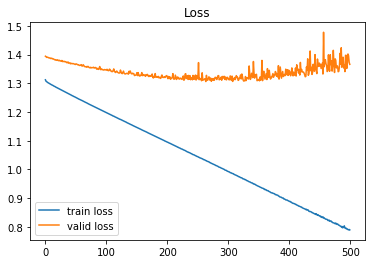

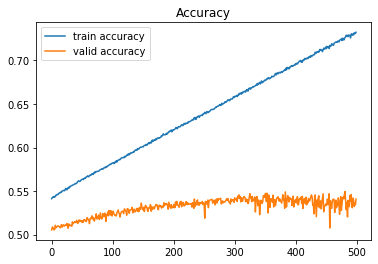

In [21]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()